In [1]:
library(readr)
sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heartrate <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
MET <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")


Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification fo

In [2]:
library(dplyr)
weight <- select(weight, -WeightPounds, -Fat, -LogId)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
head(MET)

Id,ActivityMinute,METs
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,10
1503960366,4/12/2016 12:01:00 AM,10
1503960366,4/12/2016 12:02:00 AM,10
1503960366,4/12/2016 12:03:00 AM,10
1503960366,4/12/2016 12:04:00 AM,10
1503960366,4/12/2016 12:05:00 AM,12


In [ ]:
!jupyter nbconvert --to html bellabeat.ipynb

In [4]:
weight <- weight %>% mutate(Id = as.character(Id), date = as.Date(weight$Date, format = "%m/%d/%Y"))


In [5]:
weight <- weight %>% arrange(weight)
weight <- select(weight, -Date)

In [6]:
head(sleep)
sleep <- sleep %>% mutate(Id = as.character(Id), date = as.Date(SleepDay, format = "%m/%d/%Y"), TotalSleepRecords = as.integer(TotalSleepRecords), TotalTimeInBed = as.integer(TotalTimeInBed), TotalMinutesAsleep = as.integer(TotalMinutesAsleep ))

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [7]:
head(sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
<chr>,<chr>,<int>,<int>,<int>,<date>
1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12
1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13
1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15
1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16
1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17
1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19


In [8]:
sleep <- sleep %>% arrange(sleep)


In [9]:
head(daily_activity)
daily_activity <- select(daily_activity , -TrackerDistance,)


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [10]:
daily_activity <- daily_activity %>%
  mutate(
    Id = as.character(Id),
    date = as.Date(ActivityDate, format = "%m/%d/%Y"),
    TotalSteps = as.integer(TotalSteps),
    Calories = as.integer(Calories),
    VeryActiveMinutes = as.integer(VeryActiveMinutes),
    FairlyActiveMinutes = as.integer(FairlyActiveMinutes),
    LightlyActiveMinutes = as.integer(LightlyActiveMinutes),
    SedentaryMinutes = as.integer(SedentaryMinutes)
  )


In [11]:
daily_activity <- daily_activity %>% arrange(daily_activity)
daily_activity

Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>
1503960366,4/12/2016,13162,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12
1503960366,4/13/2016,10735,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13
1503960366,4/14/2016,10460,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14
1503960366,4/15/2016,9762,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15
1503960366,4/16/2016,12669,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16
1503960366,4/17/2016,9705,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17
1503960366,4/18/2016,13019,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921,2016-04-18
1503960366,4/19/2016,15506,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,2016-04-19
1503960366,4/20/2016,10544,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786,2016-04-20


In [12]:
heartrate

Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95
2022484408,4/12/2016 7:22:10 AM,91
2022484408,4/12/2016 7:22:15 AM,93
2022484408,4/12/2016 7:22:20 AM,94


In [13]:
library(tidyr)
library(dplyr)

heartrate <- heartrate %>%
  mutate(Id = as.character(Id),
         date = as.Date(Time, format = "%m/%d/%Y"),
         time = format(as.POSIXct(Time, format = "%m/%d/%Y %I:%M:%S %p"), format = "%H:%M:%S"),
         Value = as.integer(Value))


heartrate <- select(heartrate, -Time)


In [14]:
head(heartrate)

Id,Value,date,time
<chr>,<int>,<date>,<chr>
2022484408,97,2016-04-12,07:21:00
2022484408,102,2016-04-12,07:21:05
2022484408,105,2016-04-12,07:21:10
2022484408,103,2016-04-12,07:21:20
2022484408,101,2016-04-12,07:21:25
2022484408,95,2016-04-12,07:22:05


In [15]:
MET <- MET %>%
mutate(Id = as.character(Id),
       METs = as.integer(METs),
       date = as.Date(ActivityMinute, format = "%m/%d/%Y"),
       time = format(as.POSIXct(ActivityMinute, format = "%m/%d/%Y %I:%M:%S %p"), format = "%H:%M:%S"))

In [16]:
select(MET,-ActivityMinute )

Id,METs,date,time
<chr>,<int>,<date>,<chr>
1503960366,10,2016-04-12,00:00:00
1503960366,10,2016-04-12,00:01:00
1503960366,10,2016-04-12,00:02:00
1503960366,10,2016-04-12,00:03:00
1503960366,10,2016-04-12,00:04:00
1503960366,12,2016-04-12,00:05:00
1503960366,12,2016-04-12,00:06:00
1503960366,12,2016-04-12,00:07:00
1503960366,12,2016-04-12,00:08:00


In [17]:
library(stringr)
columns_with_whitespace <- MET %>%
select_if(~ any(str_detect(., "\\s")))

# Print the columns with white spaces
print(columns_with_whitespace)

# A tibble: 1,325,580 × 1
   ActivityMinute       
   <chr>                
 1 4/12/2016 12:00:00 AM
 2 4/12/2016 12:01:00 AM
 3 4/12/2016 12:02:00 AM
 4 4/12/2016 12:03:00 AM
 5 4/12/2016 12:04:00 AM
 6 4/12/2016 12:05:00 AM
 7 4/12/2016 12:06:00 AM
 8 4/12/2016 12:07:00 AM
 9 4/12/2016 12:08:00 AM
10 4/12/2016 12:09:00 AM
# ℹ 1,325,570 more rows


In [18]:
MET$ActivityMinute = trimws(MET$ActivityMinute)

In [19]:
select(MET, -ActivityMinute)

Id,METs,date,time
<chr>,<int>,<date>,<chr>
1503960366,10,2016-04-12,00:00:00
1503960366,10,2016-04-12,00:01:00
1503960366,10,2016-04-12,00:02:00
1503960366,10,2016-04-12,00:03:00
1503960366,10,2016-04-12,00:04:00
1503960366,12,2016-04-12,00:05:00
1503960366,12,2016-04-12,00:06:00
1503960366,12,2016-04-12,00:07:00
1503960366,12,2016-04-12,00:08:00


In [20]:
# Assuming your table is named "my_table"
# Check for null values in the entire table
null_values <- is.na(MET)

# Summarize the number of null values in each column
col_null_counts <- colSums(null_values)

# Print the summary
print(col_null_counts)


            Id ActivityMinute           METs           date           time 
             0              0              0              0              0 


In [21]:
duplicate_ids <- duplicated(sleep$SleepDay) | duplicated(sleep$SleepDay, fromLast = TRUE)

duplicate_records <- sleep[duplicate_ids, ]

# Check if any duplicates exist
if (any(duplicate_ids)) {
  message("Duplicate values found.")

  print(duplicate_records)
} else {
  message("No duplicates found.")
}
#so there is no duplicates

Duplicate values found.



# A tibble: 413 × 6
   Id    SleepDay TotalSleepRecords TotalMinutesAsleep TotalTimeInBed date      
   <chr> <chr>                <int>              <int>          <int> <date>    
 1 1503… 4/12/20…                 1                327            346 2016-04-12
 2 1503… 4/13/20…                 2                384            407 2016-04-13
 3 1503… 4/15/20…                 1                412            442 2016-04-15
 4 1503… 4/16/20…                 2                340            367 2016-04-16
 5 1503… 4/17/20…                 1                700            712 2016-04-17
 6 1503… 4/19/20…                 1                304            320 2016-04-19
 7 1503… 4/20/20…                 1                360            377 2016-04-20
 8 1503… 4/21/20…                 1                325            364 2016-04-21
 9 1503… 4/23/20…                 1                361            384 2016-04-23
10 1503… 4/24/20…                 1                430            449 2016-04-24
# ℹ 403 

In [22]:
#Id, ActivityDate, TotalSteps, TotalDistance, LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance, ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes

In [23]:

# Perform the aggregation with mean calculation
average_heartrate <- aggregate(Value  ~ Id + date, data = heartrate, FUN = mean)

# For practical purposes when taking your heart rate during exercise, the following is suggested: Round the numbers off to the nearest 10 and error on the conservative. To understand how heart rate plays a role in exercise, think in terms of heart rate zones.
average_heartrate$Value <- round(average_heartrate$Value / 10) * 10

average_heartrate <- tibble(average_heartrate)
average_heartrate <- average_heartrate %>% arrange(average_heartrate)
average_heartrate 

Id,date,Value
<chr>,<date>,<dbl>
2022484408,2016-04-12,80
2022484408,2016-04-13,80
2022484408,2016-04-14,70
2022484408,2016-04-15,80
2022484408,2016-04-16,80
2022484408,2016-04-17,80
2022484408,2016-04-18,80
2022484408,2016-04-19,80
2022484408,2016-04-20,80


In [24]:
# Calculate average MET values per ID and date
average_MET <- aggregate(METs ~ Id + date, data = MET, FUN = mean)

# Round the average MET values to two decimal places
average_MET$METs <- round(average_MET$METs, 2)
# create a tibble
library(tibble)
average_MET <- tibble(average_MET)
average_MET <- average_MET %>% arrange(average_MET)
average_MET$METs <- round(average_MET$METs)


# Print the average_MET table
average_MET

Id,date,METs
<chr>,<date>,<dbl>
1503960366,2016-04-12,18
1503960366,2016-04-13,16
1503960366,2016-04-14,16
1503960366,2016-04-15,15
1503960366,2016-04-16,16
1503960366,2016-04-17,15
1503960366,2016-04-18,17
1503960366,2016-04-19,18
1503960366,2016-04-20,16


In [25]:
head(weight)

Id,WeightKg,BMI,IsManualReport,date
<chr>,<dbl>,<dbl>,<lgl>,<date>
1503960366,52.6,22.65,TRUE,2016-05-02
1503960366,52.6,22.65,TRUE,2016-05-03
1927972279,133.5,47.54,FALSE,2016-04-13
2873212765,56.7,21.45,TRUE,2016-04-21
2873212765,57.3,21.69,TRUE,2016-05-12
4319703577,72.4,27.45,TRUE,2016-04-17


In [26]:
# Create a new column called "health" based on BMI values
weight$body_mass <- ifelse(weight$BMI < 18.5, "Underweight",
                           ifelse(weight$BMI < 25, "Normal",
                                  ifelse(weight$BMI < 30, "Overweight",
                                         ifelse(weight$BMI < 35, "Obese Class I",
                                                ifelse(weight$BMI < 40, "Obese Class II",
                                                       "Obese Class III")))))

# View the updated dataset
head(weight)


Id,WeightKg,BMI,IsManualReport,date,body_mass
<chr>,<dbl>,<dbl>,<lgl>,<date>,<chr>
1503960366,52.6,22.65,TRUE,2016-05-02,Normal
1503960366,52.6,22.65,TRUE,2016-05-03,Normal
1927972279,133.5,47.54,FALSE,2016-04-13,Obese Class III
2873212765,56.7,21.45,TRUE,2016-04-21,Normal
2873212765,57.3,21.69,TRUE,2016-05-12,Normal
4319703577,72.4,27.45,TRUE,2016-04-17,Overweight


In [27]:
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>
1503960366,4/12/2016,13162,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12
1503960366,4/13/2016,10735,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13
1503960366,4/14/2016,10460,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14
1503960366,4/15/2016,9762,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15
1503960366,4/16/2016,12669,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16
1503960366,4/17/2016,9705,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17


In [28]:
get_num_rows <- function(tables_list) {
  num_rows <- sapply(tables_list, nrow)
  return(num_rows)
}
# Define the list of tables
tables_list <- list(daily_activity, average_MET, average_heartrate, weight, sleep)

# Call the function to get the number of rows for each table
num_rows <- get_num_rows(tables_list)

# Print the number of rows for each table
print(num_rows)
tail(daily_activity)


[1] 940 934 334  67 413


Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>
8877689391,5/4/2016,18193,16.30,0,10.42,0.31,5.53,0.00,66,8,212,1154,3477,2016-05-04
8877689391,5/5/2016,14055,10.67,0,5.46,0.82,4.37,0.00,67,15,188,1170,3052,2016-05-05
8877689391,5/6/2016,21727,19.34,0,12.79,0.29,6.16,0.00,96,17,232,1095,4015,2016-05-06
8877689391,5/7/2016,12332,8.13,0,0.08,0.96,6.99,0.00,105,28,271,1036,4142,2016-05-07
8877689391,5/8/2016,10686,8.11,0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,2016-05-08
8877689391,5/9/2016,20226,18.25,0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,2016-05-09


In [29]:
# Combine the tables into a single list
#tables_list <- list(daily_activity, average_MET, average_heartrate, weight, sleep)

# Specify the common column names
#common_cols <- c("Id", "Date")

# Merge the tables by the common columns
#merged_table <- Reduce(function(x, y) merge(x, y, by = common_cols, all = TRUE), tables_list)


In [30]:
average_MET

Id,date,METs
<chr>,<date>,<dbl>
1503960366,2016-04-12,18
1503960366,2016-04-13,16
1503960366,2016-04-14,16
1503960366,2016-04-15,15
1503960366,2016-04-16,16
1503960366,2016-04-17,15
1503960366,2016-04-18,17
1503960366,2016-04-19,18
1503960366,2016-04-20,16


In [31]:
# The common Id  in all tables used here: 
common_values <- Reduce(intersect, list(unique(weight$Id), unique(daily_activity$Id), unique(sleep$Id), unique(average_heartrate$Id), unique(average_MET$Id)))
common_values

[1] "4558609924" "5577150313" "6962181067"

In [53]:
common_values2 <- Reduce(intersect, list(unique(daily_activity$Id), unique(average_heartrate$Id), unique(average_MET$Id)))
common_values2

[1] "2022484408" "2026352035" "2347167796" "4020332650" "4388161847"
 [6] "4558609924" "5553957443" "5577150313" "6117666160" "6775888955"
[11] "6962181067" "7007744171" "8792009665" "8877689391"

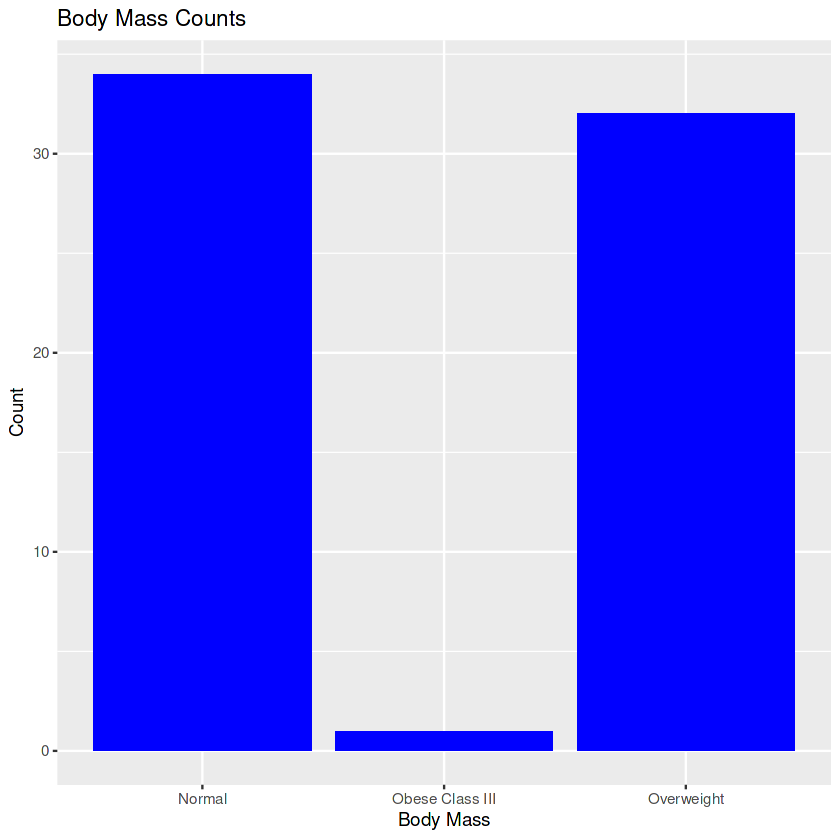

In [33]:

library(ggplot2)


# Create the pie chart
ggplot(weight, aes(x = as.factor(body_mass))) +
  geom_bar(fill = "blue") +
  labs(title = "Body Mass Counts", x = "Body Mass", y = "Count")


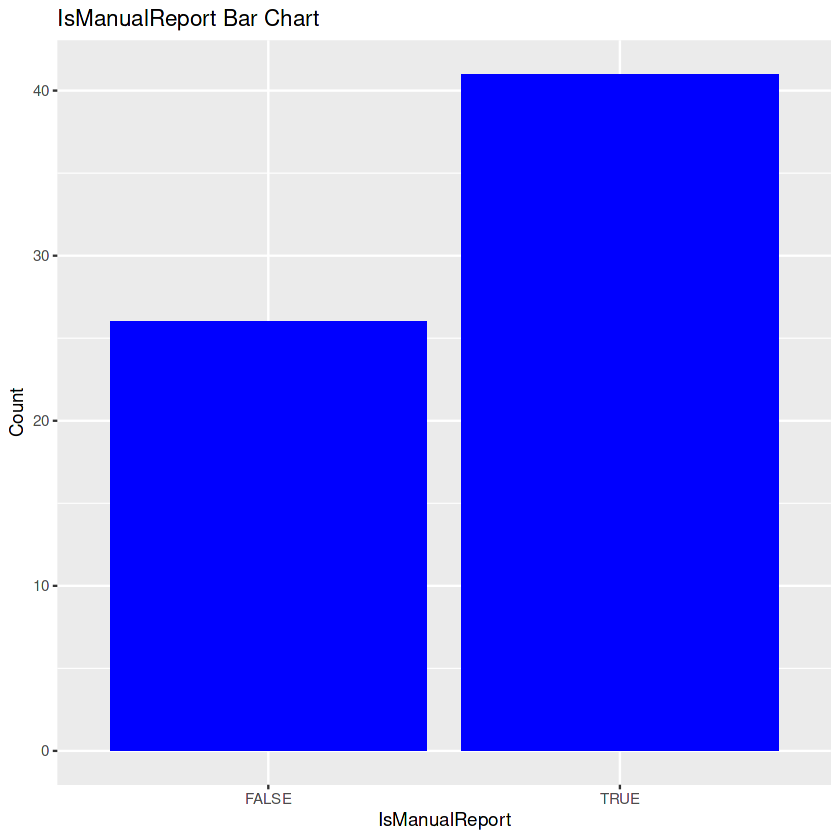

In [34]:
ggplot(weight, aes(x = IsManualReport)) +
  geom_bar(fill = "blue") +
  labs(title = "IsManualReport Bar Chart", x = "IsManualReport", y = "Count")

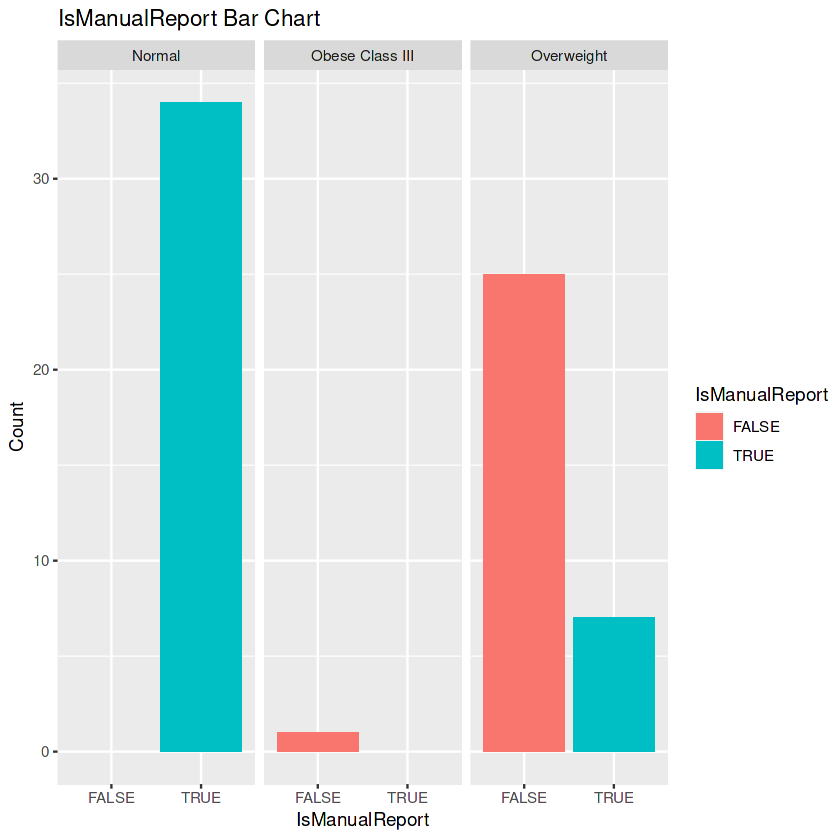

In [35]:
ggplot(weight, aes(x = IsManualReport, fill = IsManualReport)) +
  geom_bar() +
  labs(title = "IsManualReport Bar Chart", x = "IsManualReport", y = "Count") +
  facet_wrap(~ body_mass)
# insight : More the person is healthier , more he checks his weight.

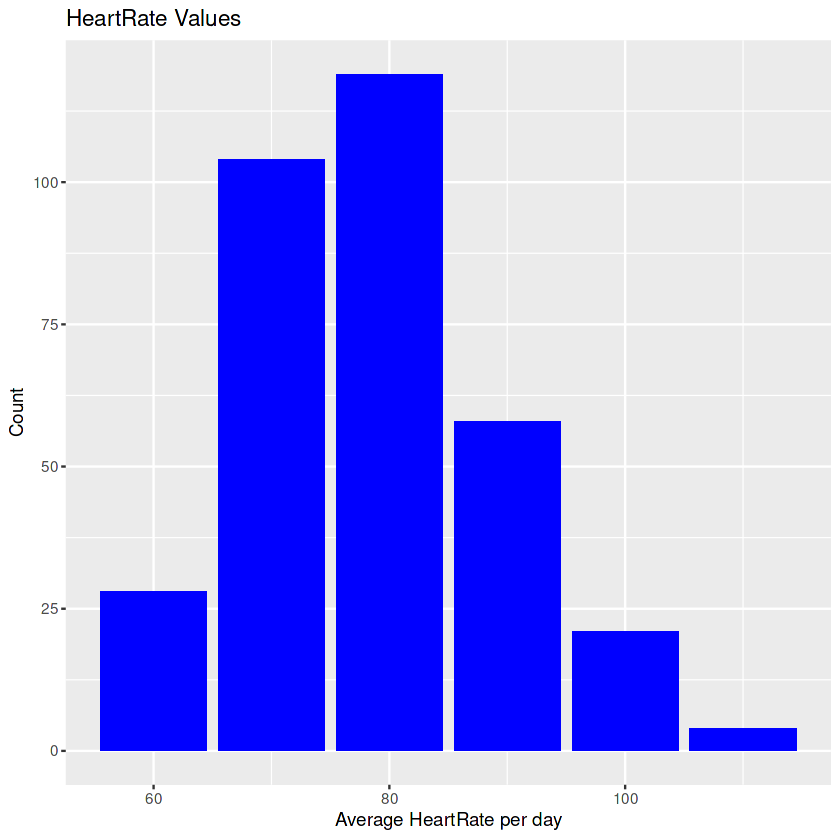

In [36]:
ggplot(average_heartrate, aes(x = Value)) +
  geom_bar(fill = "blue") +
  labs(title = "HeartRate Values", x = "Average HeartRate per day", y = "Count")

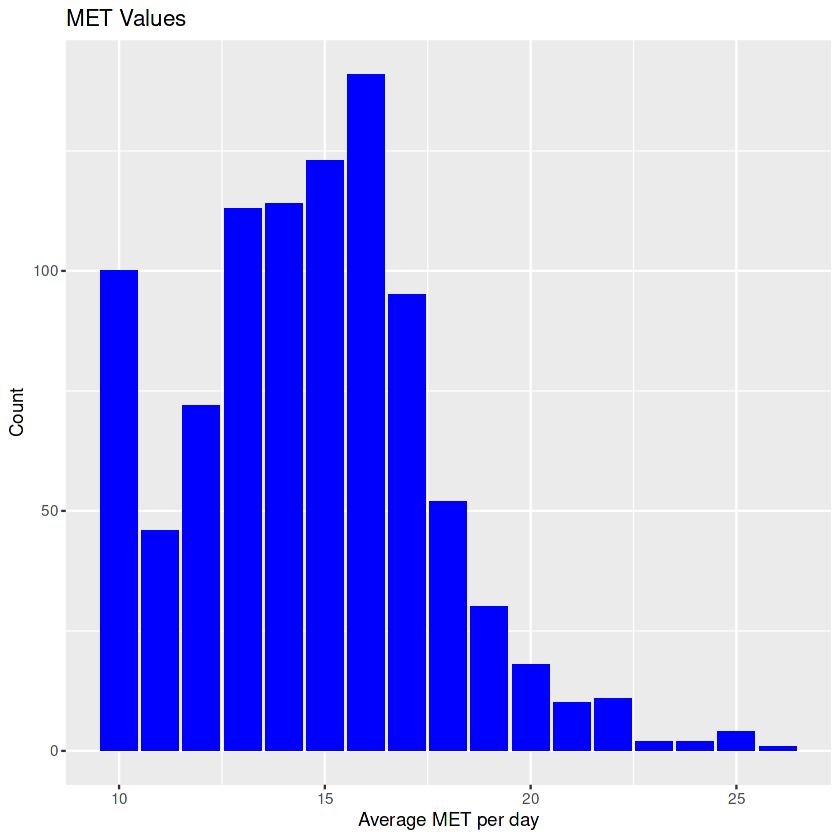

In [37]:
ggplot(average_MET, aes(x = METs)) +
  geom_bar(fill = "blue") +
  labs(title = "MET Values", x = "Average MET per day", y = "Count")
# insight : 

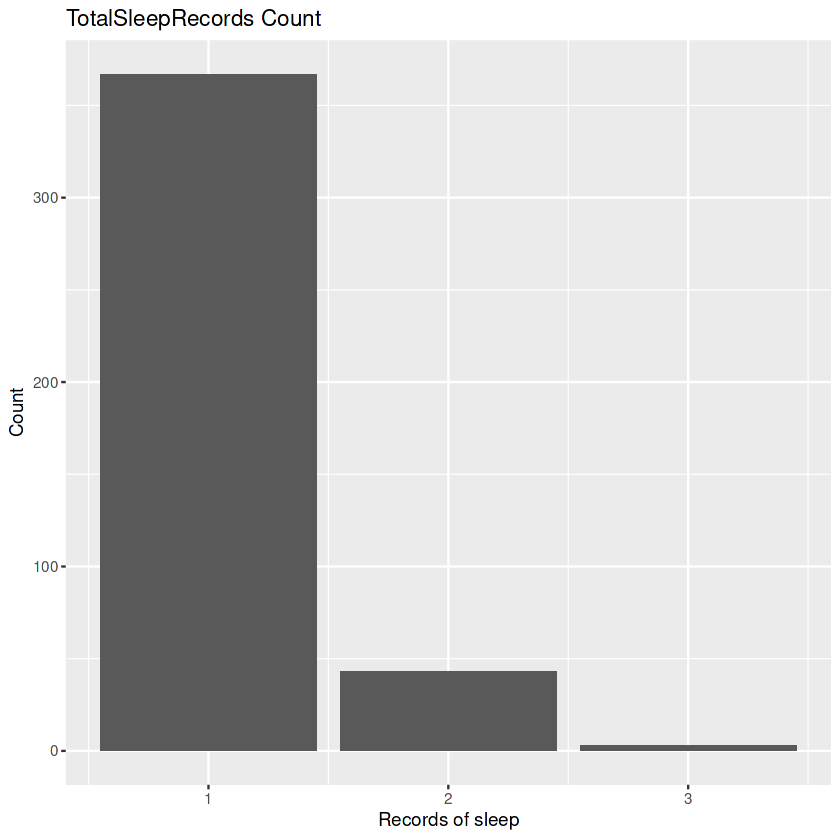

In [38]:
ggplot(sleep, aes(x = TotalSleepRecords)) +
  geom_bar() +
  labs(title = "TotalSleepRecords Count", x = "Records of sleep", y = "Count")


 

`geom_smooth()` using formula = 'y ~ x'


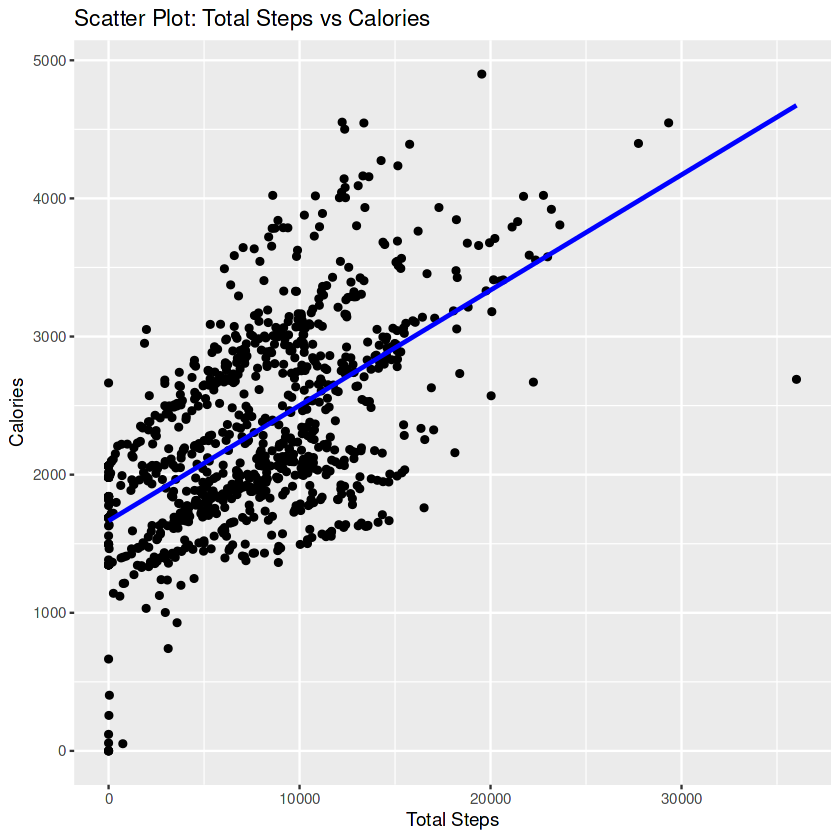

In [39]:


ggplot(daily_activity, aes(x = TotalSteps, y = Calories)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Scatter Plot: Total Steps vs Calories", x = "Total Steps", y = "Calories")
# insight  :more people ar ebetween 0 to 15000 steps

In [40]:
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>
1503960366,4/12/2016,13162,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12
1503960366,4/13/2016,10735,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13
1503960366,4/14/2016,10460,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14
1503960366,4/15/2016,9762,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15
1503960366,4/16/2016,12669,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16
1503960366,4/17/2016,9705,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


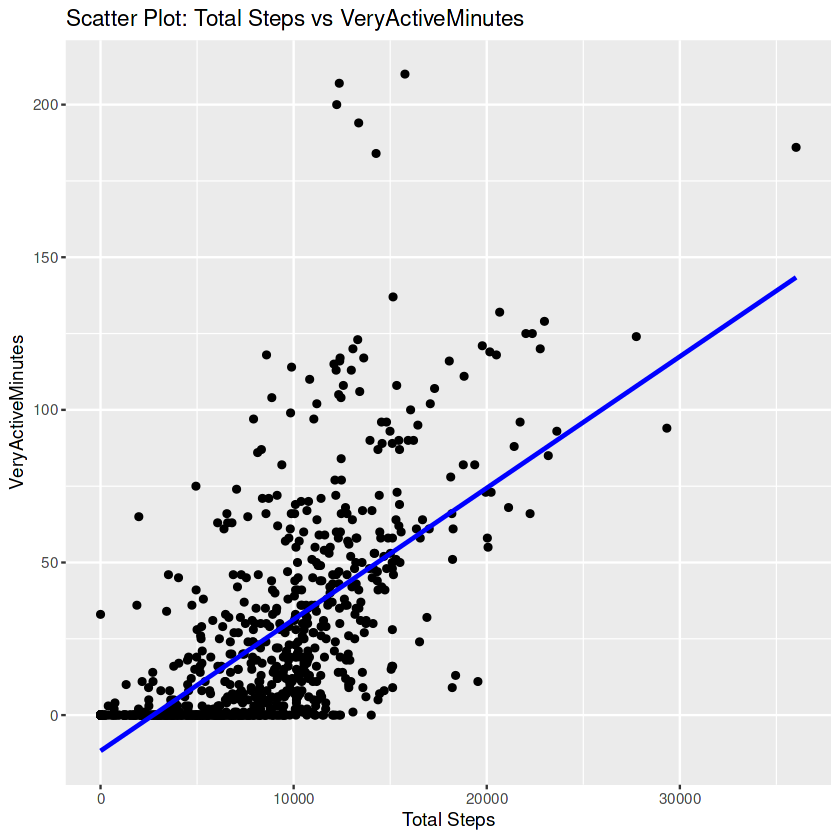

`geom_smooth()` using formula = 'y ~ x'


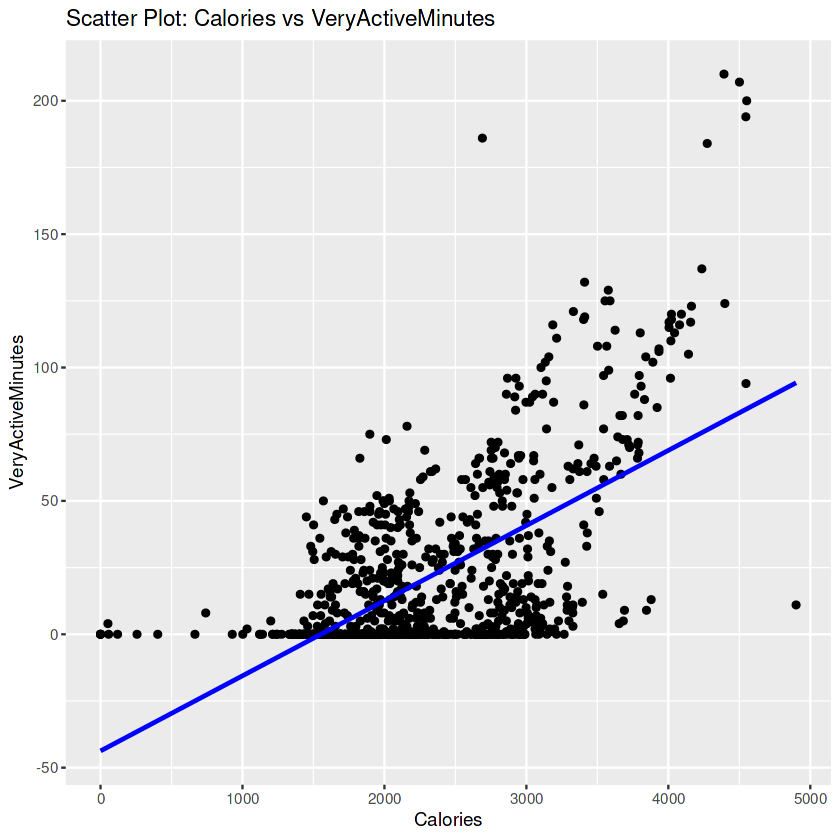

`geom_smooth()` using formula = 'y ~ x'


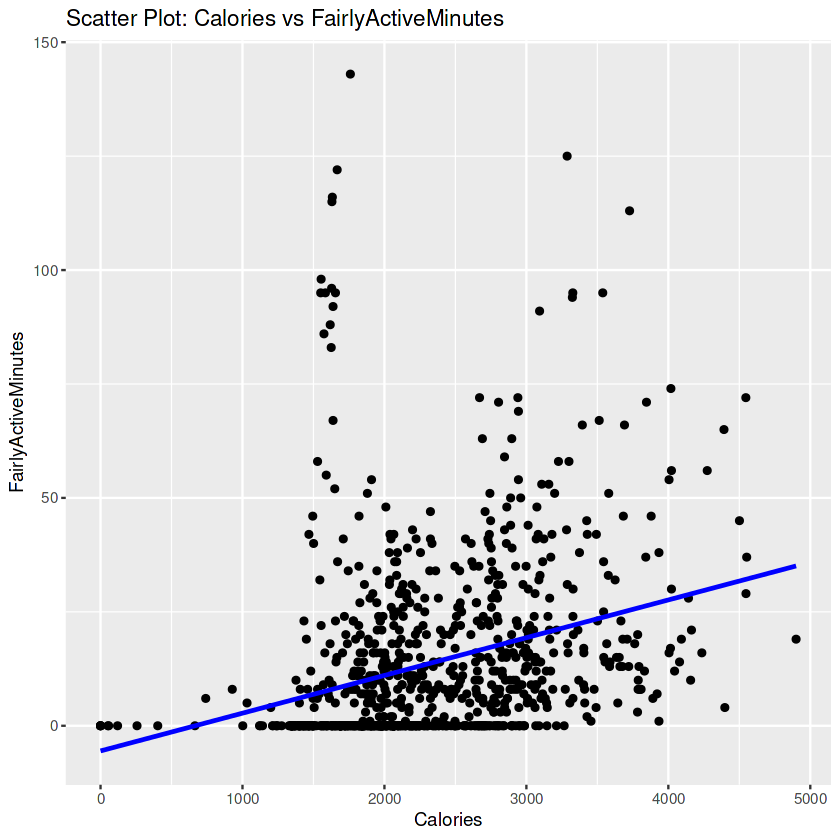

ERROR: Error in gplot(daily_activity, aes(x = Calories, y = ModeratelyActiveDistance)): could not find function "gplot"


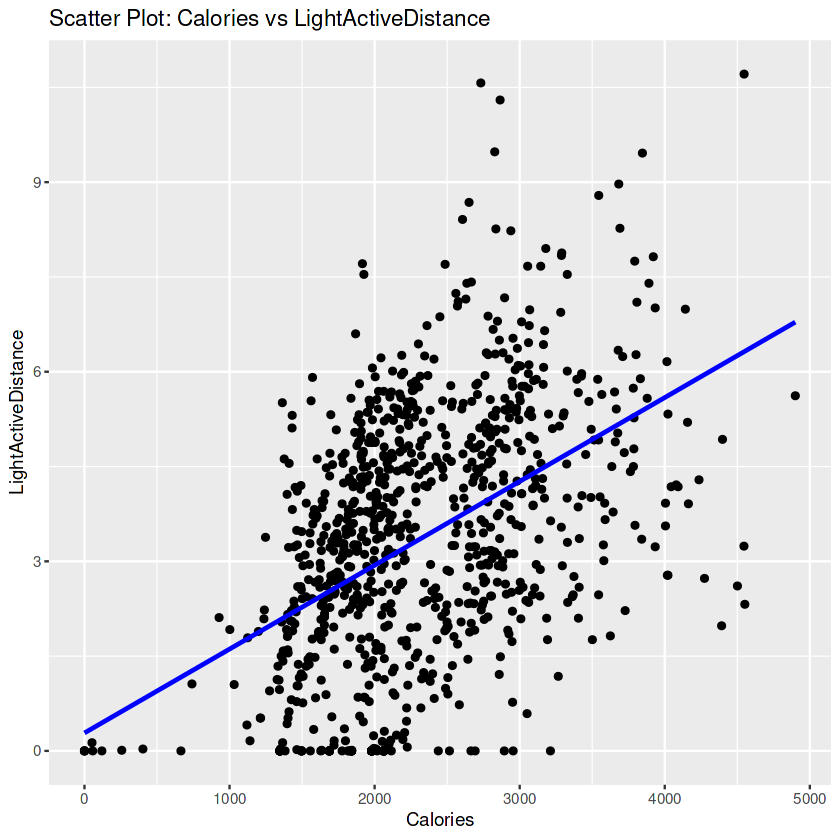

In [41]:
ggplot(daily_activity, aes(x = TotalSteps, y = VeryActiveMinutes)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Scatter Plot: Total Steps vs VeryActiveMinutes", x = "Total Steps", y = "VeryActiveMinutes")

ggplot(daily_activity, aes(x = Calories, y = VeryActiveMinutes)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Scatter Plot: Calories vs VeryActiveMinutes", x = "Calories", y = "VeryActiveMinutes")

ggplot(daily_activity, aes(x = Calories, y = FairlyActiveMinutes)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Scatter Plot: Calories vs FairlyActiveMinutes", x = "Calories", y = "FairlyActiveMinutes")

ggplot(daily_activity, aes(x = Calories, y = LightActiveDistance)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Scatter Plot: Calories vs LightActiveDistance", x = "Calories", y = "LightActiveDistance")

gplot(daily_activity, aes(x = Calories, y = ModeratelyActiveDistance)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Scatter Plot: Calories vs ModeratelyActiveDistance", x = "Calories", y = "ModeratelyActiveDistance")

ggplot(daily_activity, aes(x = Calories, y = VeryActiveDistance)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Scatter Plot: Calories vs VeryActiveDistance", x = "Calories", y = "VeryActiveDistance")

`geom_smooth()` using formula = 'y ~ x'


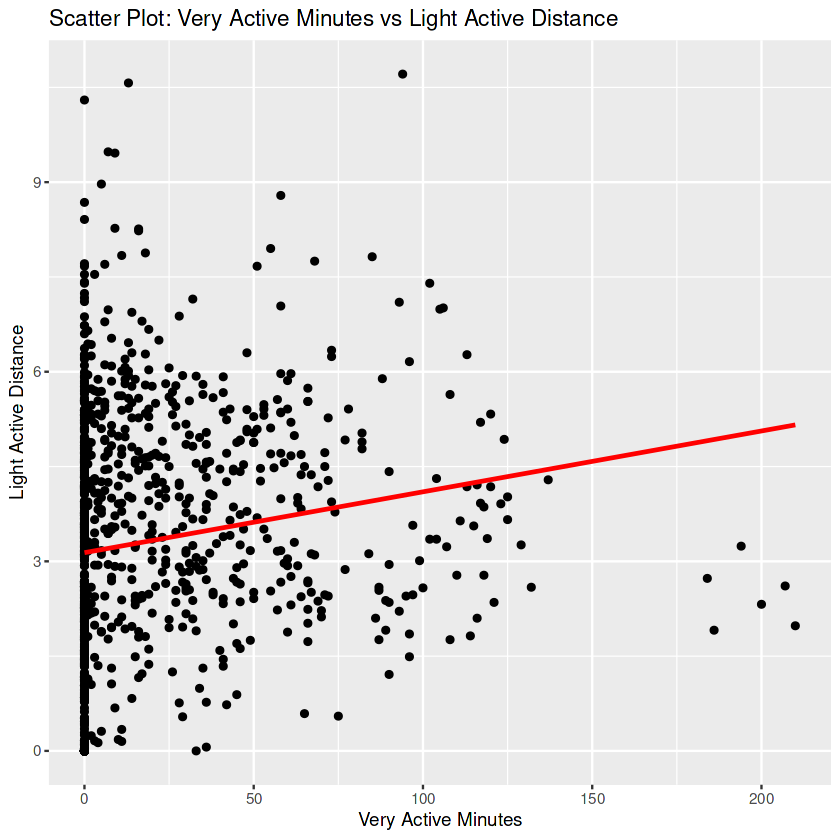

In [42]:
ggplot(daily_activity, aes(x = VeryActiveMinutes, y = LightActiveDistance)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Scatter Plot: Very Active Minutes vs Light Active Distance",
       x = "Very Active Minutes",
       y = "Light Active Distance")


In [43]:
ID <- list('4558609924', '5577150313', '6962181067')
daily_activity_filtered_data <- daily_activity[daily_activity$Id %in% ID, ]
average_heartrate_filtered_data <- average_heartrate[average_heartrate$Id %in% ID, ]
average_MET_filtered_data <- average_MET[average_MET$Id %in% ID, ]
sleep_filtered_data <- sleep[sleep$Id %in% ID, ]
weight_filtered_data <- weight[weight$Id %in% ID, ]



In [55]:
ID <- list(

    '2022484408','2026352035','2347167796','4020332650','4388161847','4558609924','5553957443','5577150313','6117666160','6775888955','6962181067','7007744171','8792009665','8877689391'

)
average_heartrate_filtered_data <- average_heartrate[average_heartrate$Id %in% ID, ]
average_MET_filtered_data <- average_MET[average_MET$Id %in% ID, ]
daily_activity_filtered_data <- daily_activity[daily_activity$Id %in% ID, ]

In [56]:
merged_data <- merge(average_heartrate_filtered_data, daily_activity_filtered_data, by = c("Id", "date"), all = FALSE)
merged_data <- merge(merged_data, average_MET_filtered_data, by = c("Id", "date"), all = FALSE)


In [60]:
  31   +       4 +        18   +      16+         30    +     31      +   31 + 28 +        23  +       18     +    31   +      24    +     18      +   31 

[1] 334

In [58]:
table(merged_data$Id)


2022484408 2026352035 2347167796 4020332650 4388161847 4558609924 5553957443 
        31          4         18         16         30         31         31 
5577150313 6117666160 6775888955 6962181067 7007744171 8792009665 8877689391 
        28         23         18         31         24         18         31 

`geom_smooth()` using formula = 'y ~ x'


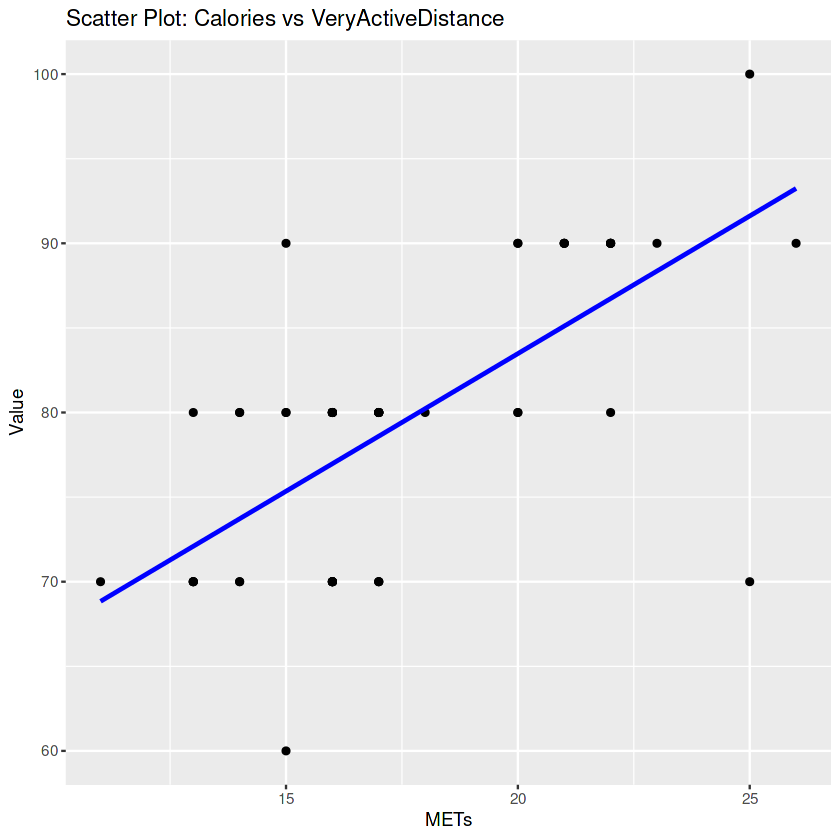

In [48]:
ggplot(merged_data1, aes(x = METs, y = Value)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Scatter Plot: Calories vs VeryActiveDistance", x = "METs", y = "Value")

In [ ]:
my_list <- list(daily_activity$ActivityDate,daily_activity$LoggedActivitiesDistance, sleep$SleepDay )

In [63]:
arrange(merged_data)

Id,date,Value,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,METs
<chr>,<date>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
2022484408,2016-04-12,80,4/12/2016,11875,8.34,0,3.31,0.77,4.26,0,42,14,227,1157,2390,16
2022484408,2016-04-13,80,4/13/2016,12024,8.50,0,2.99,0.10,5.41,0,43,5,292,1100,2601,17
2022484408,2016-04-14,70,4/14/2016,10690,7.50,0,2.48,0.21,4.82,0,32,3,257,1148,2312,15
2022484408,2016-04-15,80,4/15/2016,11034,8.03,0,1.94,0.31,5.78,0,27,9,282,1122,2525,17
2022484408,2016-04-16,80,4/16/2016,10100,7.09,0,3.15,0.55,3.39,0,41,11,151,1237,2177,15
2022484408,2016-04-17,80,4/17/2016,15112,11.40,0,3.87,0.66,6.88,0,28,29,331,1052,2782,19
2022484408,2016-04-18,80,4/18/2016,14131,10.07,0,3.64,0.12,6.30,0,48,3,311,1078,2770,19
2022484408,2016-04-19,80,4/19/2016,11548,8.53,0,3.29,0.24,5.00,0,31,7,250,1152,2489,17
2022484408,2016-04-20,80,4/20/2016,15112,10.67,0,3.34,1.93,5.40,0,48,63,276,1053,2897,19


In [64]:
file_path <- "/kaggle/working/table.csv"
write.csv(merged_data, file = file_path, row.names = FALSE)


In [ ]:
# Tableau insight : more calories burned in Lightly active minutes and distance
# Tableau insight ( steps and calories) : Less steps and less calories burned due to sleep more than 500 hours 
